# Gender Recognition by Voice Using Tree Based Algorithms

## Importing Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

In [2]:
data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,-4.049248,-4.224901,-2.576102,-5.693607,-0.214778,0.427355,2.925892,3.177486,-0.039083,0.471575,-2.141210,-1.812038,-1.384486,0.636793,-1.454772,-1.564205,-0.708404,-1.431422,-1.419137,male
1,-3.841053,-3.999293,-2.486885,-5.588987,-0.258485,0.611669,4.032721,4.022523,-0.065236,0.594431,-2.141210,-1.079594,-1.369352,-0.524133,-1.014103,-1.561916,-0.708404,-1.418107,-1.405818,male
2,-3.463066,-4.095851,-2.706986,-3.928699,0.909326,1.603848,4.675089,4.506253,-1.083730,0.398261,-2.141210,-1.365368,-1.390131,0.404082,-1.065344,-1.563866,-0.708404,-1.429203,-1.416917,male
3,-0.992157,-0.759454,-0.901418,-0.711205,0.632690,0.899998,-0.927599,-0.837709,1.516383,1.797340,-1.054576,-1.666966,-1.143909,-0.524133,0.614286,-1.195367,-0.708404,-1.273867,-1.261532,male
4,-1.530640,-1.676948,-1.268395,-0.792029,1.005588,1.322561,-1.055855,-0.807635,1.708336,2.114740,-0.790514,-1.127233,-1.239725,0.189238,0.289046,-0.221660,-0.708404,0.124154,0.136933,male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Baseline Model: Classification Tree

As discussed in the lecture, a classification tree is a simple yet effective model to start with. In this section, we will implement a classification tree with a maximum depth of 4 to classify our dataset.

### Training the Model

To train our classification tree model, we will use the `DecisionTreeClassifier` class from the `sklearn.tree` module. We will start by using the default hyperparameters for now.

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluating the Model

Firstly, we use the `score` method to see the accuracy of the model on the training set.

In [5]:
classification_tree_train_accuracy = tree.score(X_train, y_train)
print("Training set accuracy: {:.4f}".format(classification_tree_train_accuracy))

Training set accuracy: 1.0000


Then we use the `score` method to see the accuracy of the model on the test set.

In [6]:
classification_tree_test_accuracy = tree.score(X_test, y_test)
print("Test set accuracy: {:.4f}".format(classification_tree_test_accuracy))

Test set accuracy: 0.9751


We try to see the confusion matrix of the model.

<Axes: >

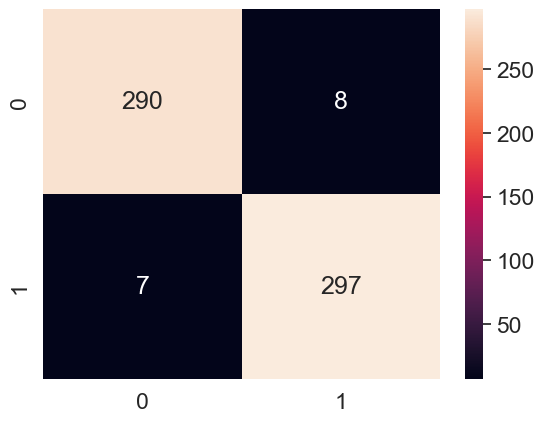

In [7]:
from sklearn.metrics import confusion_matrix

y_prediction = tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [8]:
TN, FP, FN, TP = confusion_matrix(y_test, y_prediction).ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: {:.4f}".format(TPR))
print("True Negative Rate: {:.4f}".format(TNR))
print("False Positive Rate: {:.4f}".format(FPR))
print("False Negative Rate: {:.4f}".format(FNR))

True Positive Rate: 0.9770
True Negative Rate: 0.9732
False Positive Rate: 0.0268
False Negative Rate: 0.0230


### Visualizing and Analyzing the Model

Then we try to draw the tree using `sklearn.tree.plot_tree`.

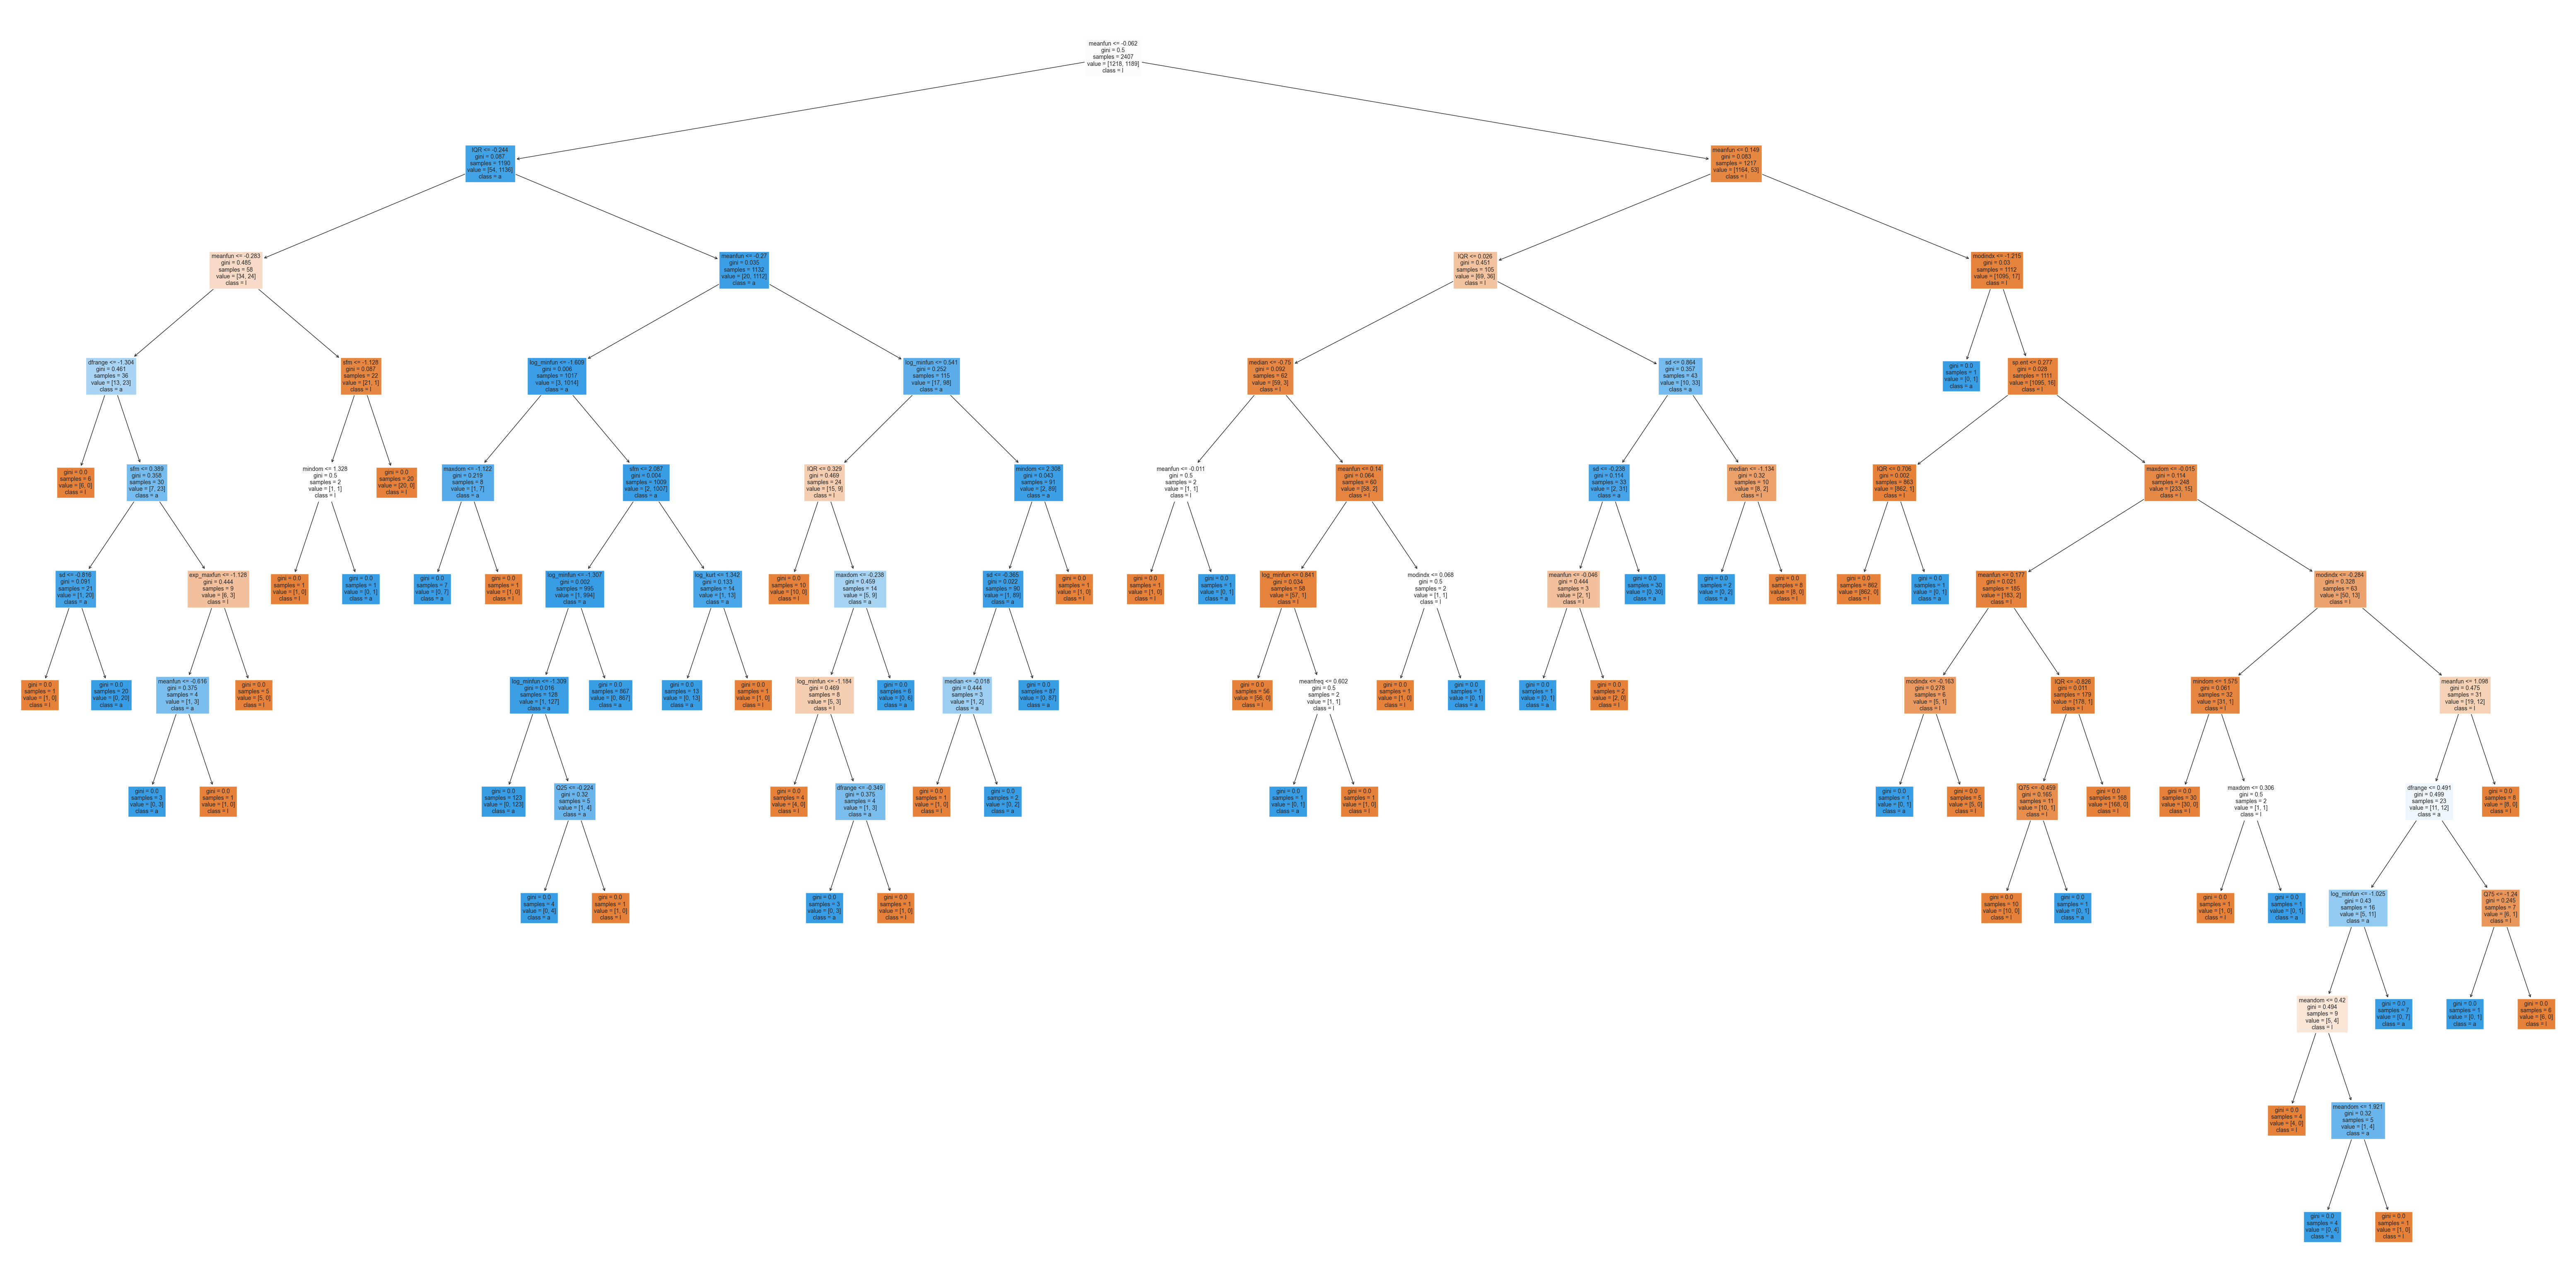

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 40))
plot_tree(tree, class_names="label", feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

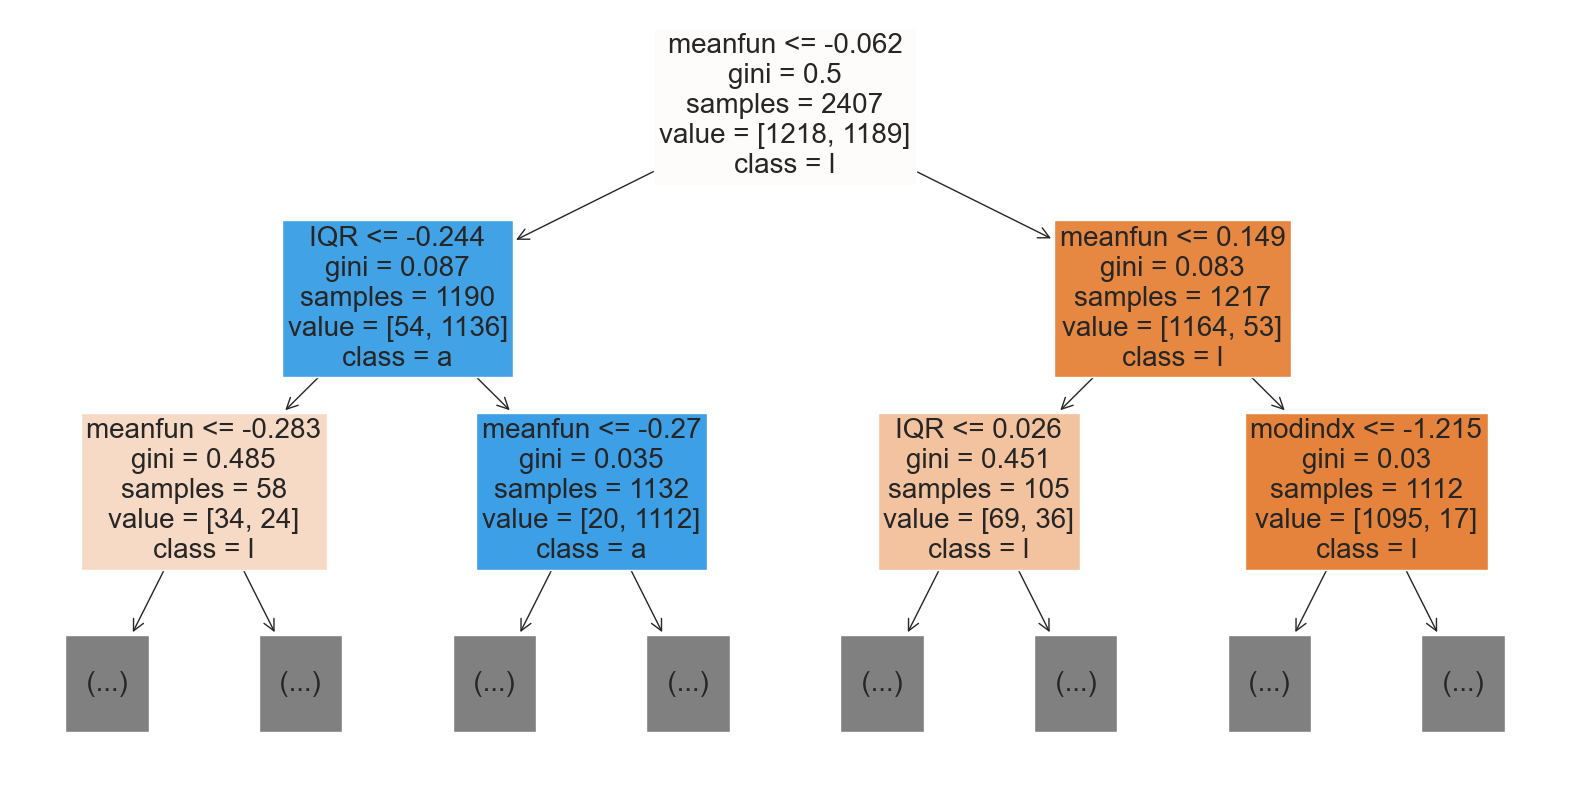

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(tree, class_names="label", feature_names=X_train.columns, filled=True, fontsize=20, max_depth=2)
plt.show()

From the tree, we can see that the most important feature is `meanfun`. The second most important feature is `IQR`.

Then, we try to plot the data with the two most important features.

<Axes: xlabel='meanfun', ylabel='IQR'>

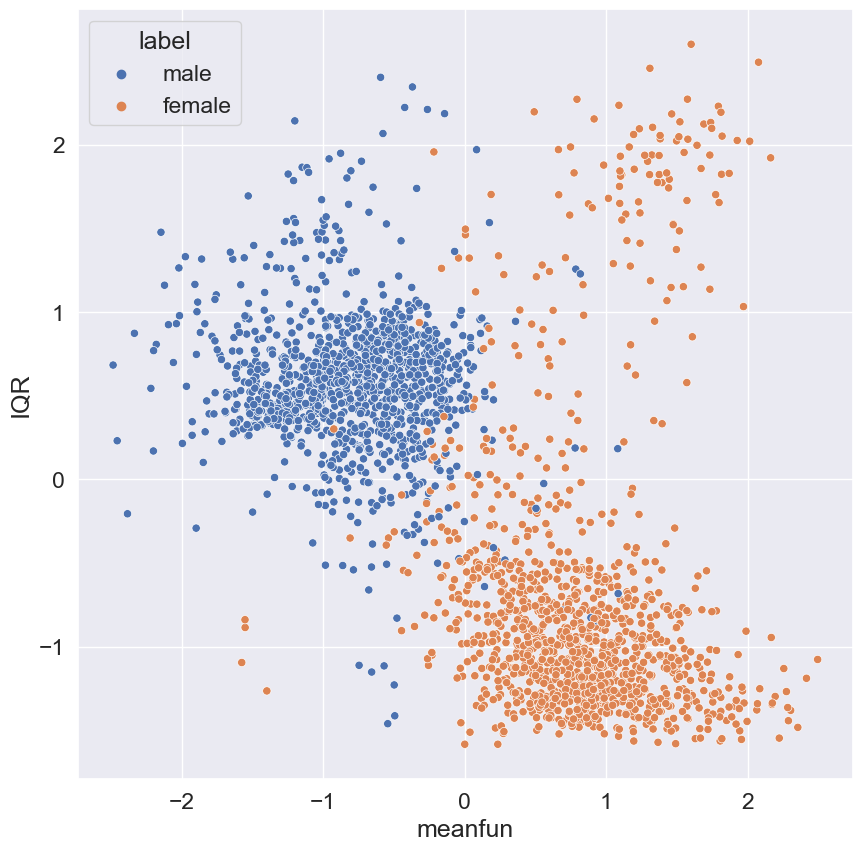

In [11]:
X_train_important = X_train[["meanfun", "IQR"]]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_train_important, x="meanfun", y="IQR", hue=y_train["label"])

## Random Forest

Training set accuracy: 1.0000
Test set accuracy: 0.9801
True Positive Rate: 0.9737
True Negative Rate: 0.9866
False Positive Rate: 0.0134
False Negative Rate: 0.0263


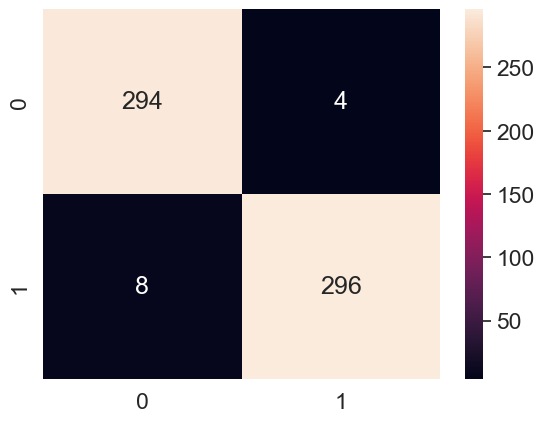

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=87).fit(X_train, y_train.squeeze())

rf_train_accuracy = rf.score(X_train, y_train)
print("Training set accuracy: {:.4f}".format(rf_train_accuracy))
rf_test_accuracy = rf.score(X_test, y_test)
print("Test set accuracy: {:.4f}".format(rf_test_accuracy))

y_prediction = rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

TN, FP, FN, TP = confusion_matrix(y_test, y_prediction).ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: {:.4f}".format(TPR))
print("True Negative Rate: {:.4f}".format(TNR))
print("False Positive Rate: {:.4f}".format(FPR))
print("False Negative Rate: {:.4f}".format(FNR))